### Ejercicios derivadas multivariable con python

1) **Calcule las derivadas parciales de la función $f(x,y)=5xye^{-x^{2}-y^{2}}$**

In [22]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource
from IPython.display import display, Math


In [23]:
# Definicion de variables
x, y = sp.symbols('x y')

# Definir la función de dos variables
F = 5* x *y * sp.exp(-x**2 - y**2)

# Calcular la derivada parciales
derivada_x = sp.diff(f, x) # parcial de x
derivada_y = sp.diff(f, y) # parcial de y


# Resultados derivadas parciales
# Parcial con respecto a x
display(Math(r"\dfrac{\partial f}{\partial x} = " + sp.latex(derivada_x)))

# Parcial con respecto a y
display(Math(r"\dfrac{\partial f}{\partial y} = " + sp.latex(derivada_y)))

# Generar matrix jacobiana
J = sp.Matrix([[derivada_x,derivada_y]])

# Mostrar matriz jacobiana formato latex
display(Math(r"J = " + sp.latex(J)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

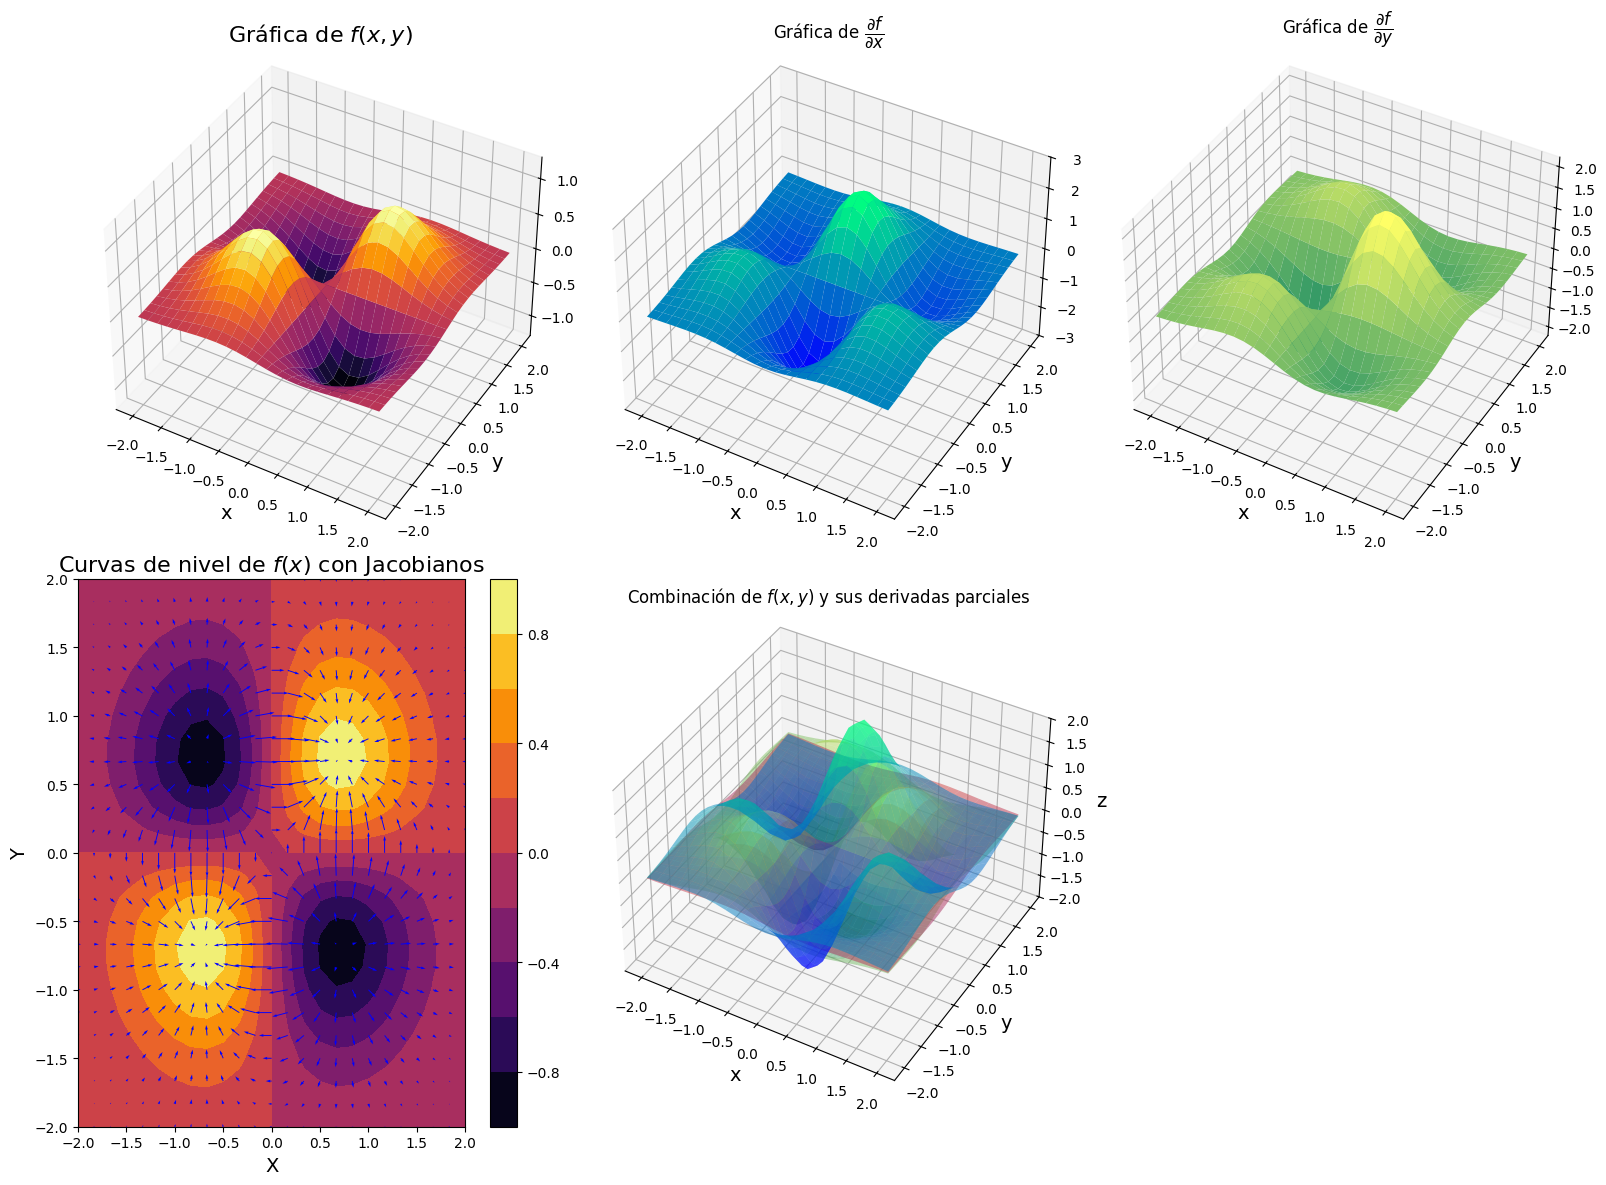

In [77]:
# Grafica de f(x) y f'(x)

# Conversión de cálculo simbólico a numérico
f_num = sp.lambdify([x, y], F, 'numpy')

# Calcular jacobianos parciales
J_x_num = sp.lambdify([x, y], J[0], 'numpy')
J_y_num = sp.lambdify([x, y], J[1], 'numpy')

# Generar datos para graficar
x_values = np.linspace(-2, 2, 25)  # Ajuste del rango de x
y_values = np.linspace(-2, 2, 25)  # Ajuste del rango de y
X, Y = np.meshgrid(x_values, y_values)

# Evaluar las funciones en los puntos correspondientes
Jx = J_x_num(X, Y)
Jy = J_y_num(X, Y)
Z = f_num(X, Y)

# Plotear
fig = plt.figure(figsize=(16, 12))

# Iluminación y sombras
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(f_x_values, cmap=cm.plasma, vert_exag=0.1, blend_mode='soft')

# Graficar la funcion en 3D
plt_3d = fig.add_subplot(231, projection='3d')
plt_3d.plot_surface(X, Y, Z, cmap="inferno", edgecolor='none')
plt_3d.set_title('Gráfica de $f(x,y)$', fontsize=16)

# Labels
plt_3d.set_xlabel('x', fontsize=14)
plt_3d.set_ylabel('y', fontsize=14)
plt_3d.set_zlabel('z', fontsize=14)
plt_3d.set_zlim([-1.3, 1.3])  # Ajuste para derivada parcial
plt_3d.view_init(elev=40)

# -----------------------------------------------

# Graficar la derivada parcial respecto a x
plt_3d_fx = fig.add_subplot(232, projection='3d')
plt_3d_fx.plot_surface(X, Y, Jx, cmap="winter", edgecolor='none')
plt_3d_fx.set_title(r'Gráfica de $\dfrac{\partial f}{\partial x}$')
plt_3d_fx.set_xlabel('x', fontsize=14)
plt_3d_fx.set_ylabel('y', fontsize=14)
plt_3d_fx.set_zlabel('z', fontsize=14)
plt_3d_fx.set_zlim([-3, 3])  # Ajuste para derivada parcial
plt_3d_fx.view_init(elev=40)

# -----------------------------------------------

# Graficar la derivada parcial respecto a y
plt_3d_fy = fig.add_subplot(233, projection='3d')
plt_3d_fy.plot_surface(X, Y, Jy, cmap="summer", edgecolor='none')
plt_3d_fy.set_title(r'Gráfica de $\dfrac{\partial f}{\partial y}$')
plt_3d_fy.set_xlabel('x', fontsize=14)
plt_3d_fy.set_ylabel('y', fontsize=14)
plt_3d_fy.set_zlabel('z', fontsize=14)
plt_3d_fx.set_zlim([-3, 3])  # Ajuste para derivada parcial
plt_3d_fy.view_init(elev=40)

# -----------------------------------------------

# Graficar curvas de nivel para f(x,y) con jacobianos
c_f_2d = fig.add_subplot(234)
contour = c_f_2d.contourf(X, Y, Z, levels=10, cmap='inferno')
c_f_2d.quiver(X, Y, Jx, Jy, color='blue')
c_f_2d.set_title('Curvas de nivel de $f(x)$ con Jacobianos', fontsize=16)
c_f_2d.set_xlabel('X', fontsize=14)
c_f_2d.set_ylabel('Y', fontsize=14)
fig.colorbar(contour, ax=c_f_2d)

# ------------------------------------------------

# Graficar la combinación de la función y sus derivadas parciales
plt_3d_combined = fig.add_subplot(235, projection='3d')

# Graficar la función original
plt_3d_combined.plot_surface(X, Y, Z, cmap='inferno', edgecolor='none', alpha=0.5)

# Graficar la derivada parcial respecto a x
plt_3d_combined.plot_surface(X, Y, Jx, cmap='winter', edgecolor='none', alpha=0.5)

# Graficar la derivada parcial respecto a y
plt_3d_combined.plot_surface(X, Y, Jy, cmap='summer', edgecolor='none', alpha=0.5)

plt_3d_combined.set_title('Combinación de $f(x,y)$ y sus derivadas parciales')
plt_3d_combined.set_xlabel('x', fontsize=14)
plt_3d_combined.set_ylabel('y', fontsize=14)
plt_3d_combined.set_zlabel('z', fontsize=14)
plt_3d_combined.set_zlim([-2, 2])  # Ajuste para visualizar todas las superficies
plt_3d_combined.view_init(elev=40)

# -----------------------------------------------

plt.tight_layout()
plt.show()